<a href="https://colab.research.google.com/github/poojitha1502/nlp--/blob/main/NLP_Lab_29_08_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please make sure 'train.csv' is in the current directory.
Number of tweets per label:
target
0    2
1    2
Name: count, dtype: int64


/tmp/ipython-input-3054573346.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


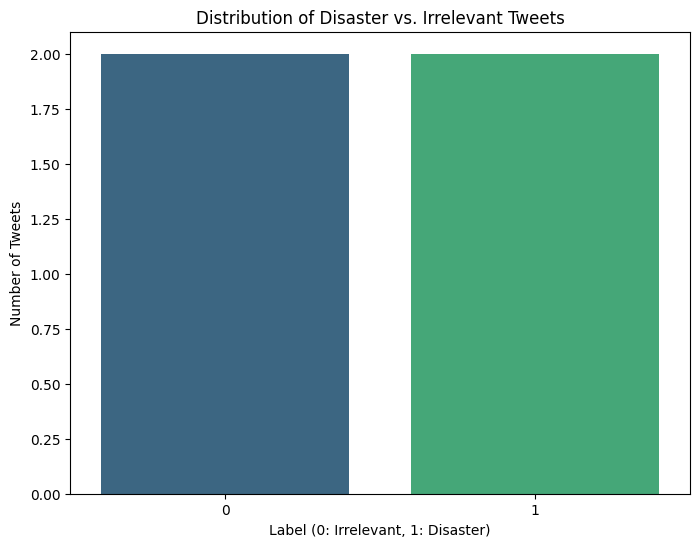


--- Sample Tweets ---
                                        text  target
Irrelevant (0)       0        Sample tweet 1       0
                     2         Just a joke 3       0
Disaster-related (1) 1     Sample disaster 2       1
                     3  Fire in my kitchen 4       1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Preprocessing applied. A 'processed_text' column has been added.
                   text      processed_text
0        Sample tweet 1     [sample, tweet]
1     Sample disaster 2  [sample, disaster]
2         Just a joke 3              [joke]
3  Fire in my kitchen 4     [fire, kitchen]


[nltk_data] Downloading package wordnet to /root/nltk_data...


          Original       Stemmed       Lemmatized
0     sample tweet   sampl tweet     sample tweet
1  sample disaster  sampl disast  sample disaster
2             joke          joke             joke
3     fire kitchen  fire kitchen     fire kitchen


/tmp/ipython-input-3054573346.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=top_15_df, palette='plasma')


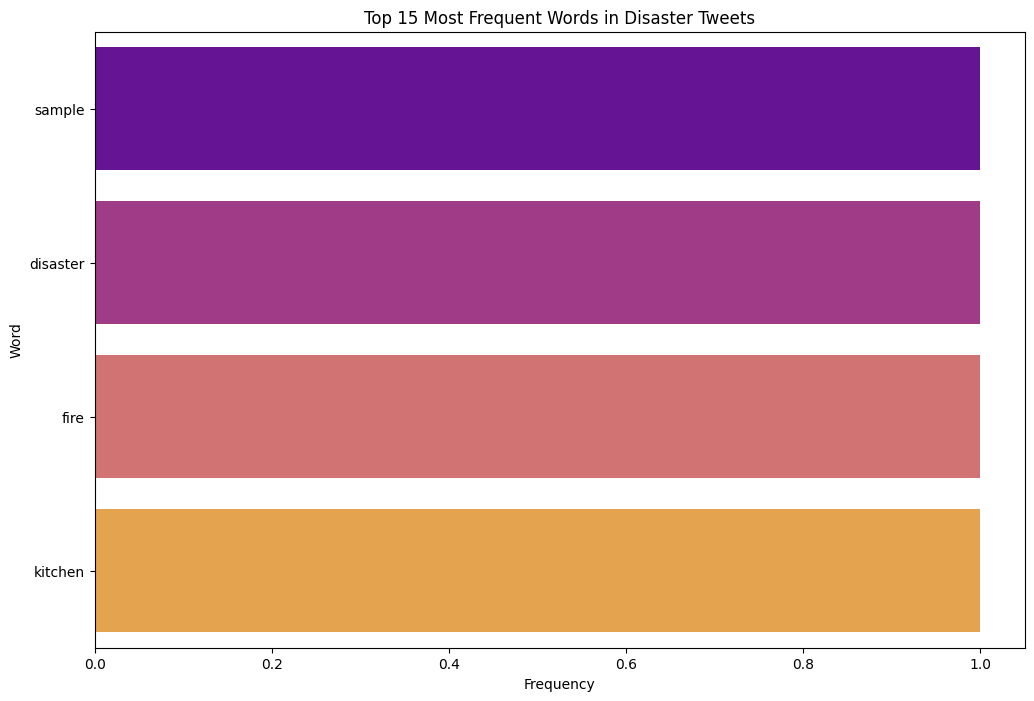

Average tweet length (in tokens) BEFORE preprocessing: 3.75
Average tweet length (in tokens) AFTER preprocessing: 1.75
TF-IDF matrix created.
Shape of the matrix: (4, 6)
--- Model Performance ---
Accuracy: 0.0000

                precision    recall  f1-score   support

Irrelevant (0)       0.00      0.00      0.00       0.0
  Disaster (1)       0.00      0.00      0.00       1.0

      accuracy                           0.00       1.0
     macro avg       0.00      0.00      0.00       1.0
  weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

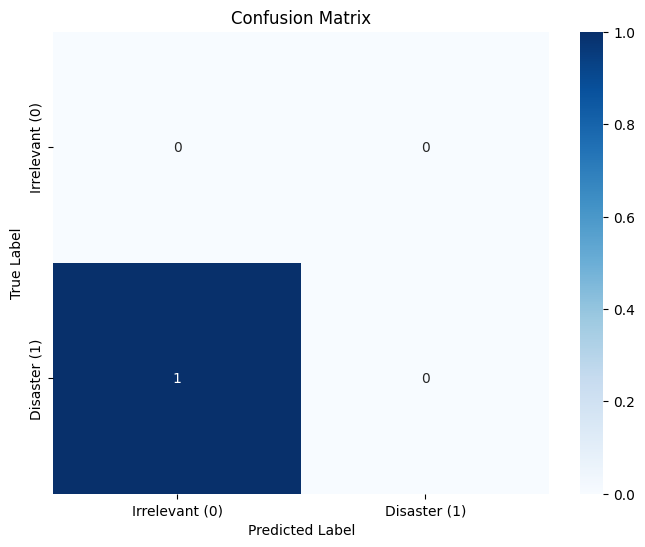

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


try:
    df = pd.read_csv('/content/train.csv')
except FileNotFoundError:
    print("Please make sure 'train.csv' is in the current directory.")
    data = {'text': ['Sample tweet 1', 'Sample disaster 2', 'Just a joke 3', 'Fire in my kitchen 4'],
            'target': [0, 1, 0, 1]}
    df = pd.DataFrame(data)

label_counts = df['target'].value_counts()
print("Number of tweets per label:")
print(label_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title('Distribution of Disaster vs. Irrelevant Tweets')
plt.xlabel('Label (0: Irrelevant, 1: Disaster)')
plt.ylabel('Number of Tweets')
plt.xticks([0, 1])
plt.show()

print("\n--- Sample Tweets ---")
irrelevant_samples = df[df['target'] == 0].head(5)
disaster_samples = df[df['target'] == 1].head(5)

samples_df = pd.concat([irrelevant_samples, disaster_samples], keys=['Irrelevant (0)', 'Disaster-related (1)'])
print(samples_df[['text', 'target']].to_string())

import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """A function to clean and preprocess a single tweet."""
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)

    text = text.lower()

    tokens = word_tokenize(text)

    processed_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return processed_tokens

df['processed_text'] = df['text'].apply(preprocess_text)
print("Preprocessing applied. A 'processed_text' column has been added.")
print(df[['text', 'processed_text']].head().to_string())


from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

sample_texts = df['text'].head()

comparison_data = []
for text in sample_texts:
    tokens = preprocess_text(text)

    stemmed = [stemmer.stem(word) for word in tokens]
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]

    comparison_data.append({
        "Original": " ".join(tokens),
        "Stemmed": " ".join(stemmed),
        "Lemmatized": " ".join(lemmatized)
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string())


from collections import Counter

lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['processed_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

disaster_tweets_words = df[df['target'] == 1]['lemmatized_text'].sum()

word_freq = Counter(disaster_tweets_words)

top_15_words = word_freq.most_common(15)
top_15_df = pd.DataFrame(top_15_words, columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=top_15_df, palette='plasma')
plt.title('Top 15 Most Frequent Words in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


df['len_before'] = df['text'].apply(lambda x: len(x.split()))
avg_len_before = df['len_before'].mean()

df['len_after'] = df['processed_text'].apply(len)
avg_len_after = df['len_after'].mean()

print(f"Average tweet length (in tokens) BEFORE preprocessing: {avg_len_before:.2f}")
print(f"Average tweet length (in tokens) AFTER preprocessing: {avg_len_after:.2f}")


from sklearn.feature_extraction.text import TfidfVectorizer

df['lemmatized_str'] = df['lemmatized_text'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)

X = tfidf_vectorizer.fit_transform(df['lemmatized_str'])
y = df['target']

print("TF-IDF matrix created.")
print(f"Shape of the matrix: {X.shape}")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("--- Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(classification_report(y_test, y_pred, target_names=['Irrelevant (0)', 'Disaster (1)']))


from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Irrelevant (0)', 'Disaster (1)'],
            yticklabels=['Irrelevant (0)', 'Disaster (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()